<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/AlgoritmosEscalamiento1.PNG" alt="drawing" width="850">

Este notebook se hizo siguiendo los pasos del tutorial de YouTube llamado "Escalamiento, estandarización y normalización - Inteligencia Artificial" subido por el usuario nicosiored. Link del vídeo: https://www.youtube.com/watch?v=Zw175M0-W94

Para alimentar una red neuronal con datos es necesario estandarizarlos y escalarlos, esto permite una convergencia más rápida hacia los mínimos globales de la superficie de error. En este ejercicio solo se revisaran las funciones de escalamiento, estandarización y nrmalización más no como afectan el desempeño de una red.

## Librerías y distribuciones de probabilidad

Se comineza el ejercicio importando las librerías correspondientes.

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Ahora creamos una serie de distribuciones de probabilidad por medio de unas funciones de la librería numpy. Estas distribuciones serán utilizadas para observar los efectos que tienen los algorimos de esclamiento y normalización.

In [5]:
beta=np.random.beta(4,1,1000)*50
expo=np.random.exponential(10,1000)
bimodal=np.concatenate([np.random.normal(20,2.5,500),np.random.normal(-20,2.5,500)])
normalP=np.random.normal(10,3,1000)
normalL=np.random.normal(10,12,1000)
normalM=np.random.normal(0,1,1000)

# Se colocan en un dataFrame
dataset=pd.DataFrame({"Beta":beta,"Exponencial":expo,"Bimodal":bimodal,"NormalP":normalP,"NormalL":normalL,"NormalM":normalM})

Una vez creadas las distribucione, éstas son graficadas en las siguientes figuras.

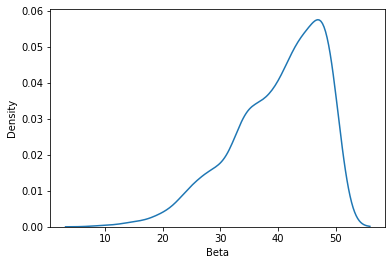

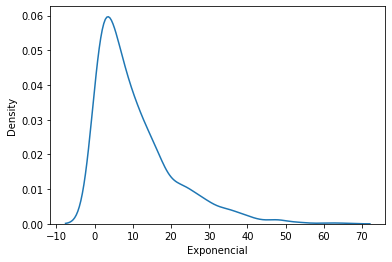

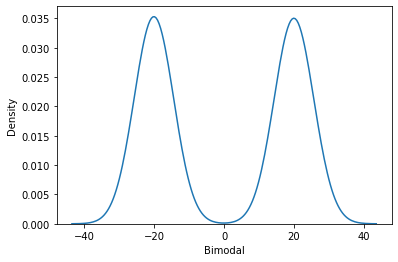

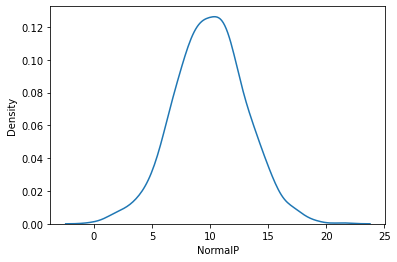

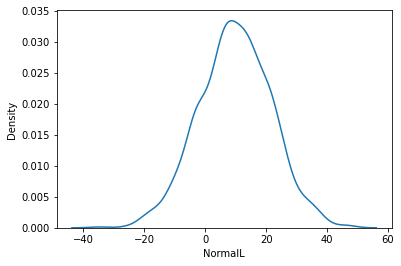

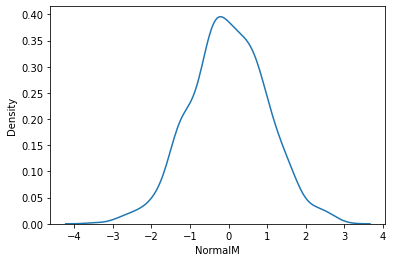

In [9]:
plt.show(sns.kdeplot(dataset["Beta"]))
plt.show(sns.kdeplot(dataset["Exponencial"]))
plt.show(sns.kdeplot(dataset["Bimodal"]))
plt.show(sns.kdeplot(dataset["NormalP"]))
plt.show(sns.kdeplot(dataset["NormalL"]))
plt.show(sns.kdeplot(dataset["NormalM"]))

Las distribuciones se gráfican de manera conjunta para observar las diferencias que muestran entre ellas.

<AxesSubplot:xlabel='Beta', ylabel='Density'>

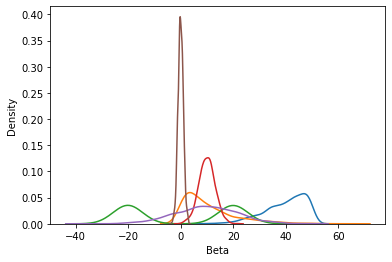

In [17]:
sns.kdeplot(dataset["Beta"])
sns.kdeplot(dataset["Exponencial"])
sns.kdeplot(dataset["Bimodal"])
sns.kdeplot(dataset["NormalP"])
sns.kdeplot(dataset["NormalL"])
sns.kdeplot(dataset["NormalM"])

Se muestran algunos datos de las distribuciones creadas.

In [18]:
print(dataset.head())
print("----------")
print(dataset.mean())

        Beta  Exponencial    Bimodal    NormalP    NormalL   NormalM
0  40.826505     8.847997  23.497688  12.565105  14.821874  0.920987
1  40.849141     2.432700  21.398881   8.993119  14.141963 -0.375363
2  28.499137    15.515639  16.500859  13.981427  27.636894  1.077303
3  49.956309    11.809990  18.395089   7.809513  -0.274953  0.927353
4  45.572622    46.712005  19.056945   9.548662  12.308367 -0.883345
----------
Beta           39.970792
Exponencial    10.586032
Bimodal        -0.058691
NormalP         9.983956
NormalL         9.799744
NormalM        -0.008940
dtype: float64


En conjunto con sus estadísticos descriptivos.

In [22]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Beta,1000.0,39.970792,7.833195,9.093662,34.956900,41.716122,46.439320,49.980472
Exponencial,1000.0,10.586032,10.132632,0.013381,3.146176,7.265867,15.004442,64.467798
Bimodal,1000.0,-0.058691,20.244919,-28.331589,-20.163472,-0.379853,19.932175,28.308289
NormalP,1000.0,9.983956,3.085439,-0.103008,7.990597,9.964773,11.954484,21.450439
NormalL,1000.0,9.799744,11.822155,-34.895305,2.083096,9.847754,17.932762,47.299237
NormalM,1000.0,-0.008940,0.995056,-3.471700,-0.633098,-0.024880,0.665303,2.915926


## Algoritmos de escalamiento, estandarización y normalización

### Primer algoritmo: MinMaxScaler
Usa un rango que existe entre los valores máximos y mínimos, conserva la 
forma de la distribución pero también la importancia de los datos
atípicos

In [23]:
escalador=preprocessing.MinMaxScaler()
dsE=escalador.fit_transform(dataset)

# Se regresa al formato dataframe(datos, nombres de columnas)
dsFinal=pd.DataFrame(dsE,columns=dataset.columns)

Se grafican las nuevas distribuciones

<AxesSubplot:xlabel='Beta', ylabel='Density'>

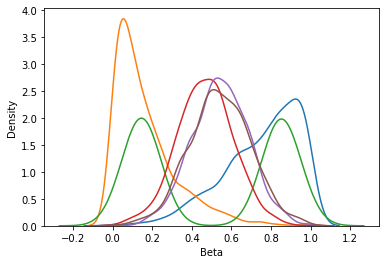

In [24]:
sns.kdeplot(dsFinal["Beta"])
sns.kdeplot(dsFinal["Exponencial"])
sns.kdeplot(dsFinal["Bimodal"])
sns.kdeplot(dsFinal["NormalP"])
sns.kdeplot(dsFinal["NormalL"])
sns.kdeplot(dsFinal["NormalM"])

In [28]:
 print(dataset.columns)

Index(['Beta', 'Exponencial', 'Bimodal', 'NormalP', 'NormalL', 'NormalM'], dtype='object')


Se pueden comparar las gráficas nuevas con las antiguas

<AxesSubplot:xlabel='NormalM', ylabel='Density'>

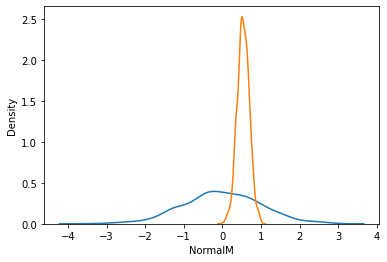

In [31]:
sns.kdeplot(dataset["NormalM"])
sns.kdeplot(dsFinal["NormalM"])

In [33]:
dsFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Beta,1000.0,0.755186,0.191582,0.0,0.632557,0.797872,0.913391,1.0
Exponencial,1000.0,0.164033,0.157206,0.0,0.048605,0.112521,0.232584,1.0
Bimodal,1000.0,0.499169,0.357432,0.0,0.144211,0.493499,0.852116,1.0
NormalP,1000.0,0.467998,0.143153,0.0,0.375513,0.467108,0.559423,1.0
NormalL,1000.0,0.543772,0.143831,0.0,0.449889,0.544356,0.642720,1.0
NormalM,1000.0,0.542104,0.155779,0.0,0.444391,0.539609,0.647659,1.0


### Segundo algoritmo: RobustScaler
No utiliza un rango específico, en este algoritmo la media varía debido a que le quita influencia a los datos atípicos.

In [34]:
escalador=preprocessing.RobustScaler()
dsE=escalador.fit_transform(dataset)

dsFinal=pd.DataFrame(dsE,columns=dataset.columns)

Se grafican las nuevas distribuciones

<AxesSubplot:xlabel='Beta', ylabel='Density'>

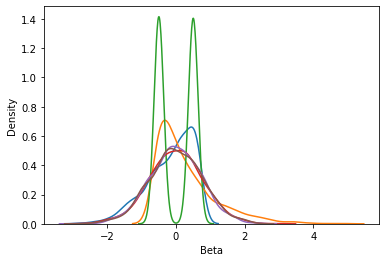

In [35]:
sns.kdeplot(dsFinal["Beta"])
sns.kdeplot(dsFinal["Exponencial"])
sns.kdeplot(dsFinal["Bimodal"])
sns.kdeplot(dsFinal["NormalP"])
sns.kdeplot(dsFinal["NormalL"])
sns.kdeplot(dsFinal["NormalM"])

<AxesSubplot:xlabel='NormalM', ylabel='Density'>

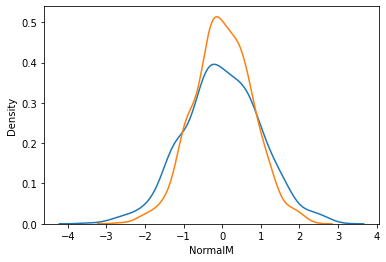

In [36]:
sns.kdeplot(dataset["NormalM"])
sns.kdeplot(dsFinal["NormalM"])

In [37]:
dsFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Beta,1000.0,-0.152000,0.682190,-2.841079,-0.588658,-3.094042e-16,0.411342,0.719739
Exponencial,1000.0,0.279987,0.854478,-0.611598,-0.347411,0.000000e+00,0.652589,4.823802
Bimodal,1000.0,0.008010,0.504916,-0.697126,-0.493411,0.000000e+00,0.506589,0.715493
NormalP,1000.0,0.004839,0.778387,-2.539875,-0.498041,0.000000e+00,0.501959,2.897576
NormalL,1000.0,-0.003029,0.745893,-2.822965,-0.489894,-5.603970e-17,0.510106,2.362919
NormalM,1000.0,0.012277,0.766370,-2.654664,-0.468436,0.000000e+00,0.531564,2.264943


### Tercer algoritmo: StandardScaler
Es un proceso de estandarización, aquí se hace que la desviación estándar sea igual a uno con una media de cero. Ayuda a que los datos se asemejen a una distribución normal. 

In [39]:
escalador=preprocessing.StandardScaler()
dsE=escalador.fit_transform(dataset)

dsFinal=pd.DataFrame(dsE,columns=dataset.columns)

<AxesSubplot:xlabel='Beta', ylabel='Density'>

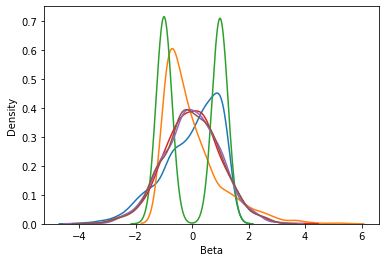

In [40]:
sns.kdeplot(dsFinal["Beta"])
sns.kdeplot(dsFinal["Exponencial"])
sns.kdeplot(dsFinal["Bimodal"])
sns.kdeplot(dsFinal["NormalP"])
sns.kdeplot(dsFinal["NormalL"])
sns.kdeplot(dsFinal["NormalM"])

<AxesSubplot:xlabel='NormalM', ylabel='Density'>

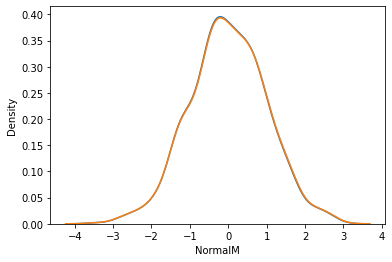

In [41]:
sns.kdeplot(dataset["NormalM"])
sns.kdeplot(dsFinal["NormalM"])

In [42]:
dsFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Beta,1000.0,3.463896e-16,1.0005,-3.943803,-0.640403,0.222923,0.826197,1.278494
Exponencial,1000.0,-9.414691e-17,1.0005,-1.043948,-0.734614,-0.327834,0.436276,5.320308
Bimodal,1000.0,-5.684342e-17,1.0005,-1.397242,-0.993575,-0.015872,0.987945,1.401891
NormalP,1000.0,-1.971756e-16,1.0005,-3.270851,-0.646377,-0.006220,0.638974,3.718182
NormalL,1000.0,2.016165e-16,1.0005,-3.782510,-0.653054,0.004063,0.688291,3.173555
NormalM,1000.0,-3.552714e-17,1.0005,-3.481708,-0.627574,-0.016028,0.677932,2.940870


###  Cuarto algoritmo: Normalizer
Trabaja en las filas, no en las columnas. Transforma todos los valores entre -1 y 1. Es muy poco utilizado. 

In [44]:
escalador=preprocessing.Normalizer()
dsE=escalador.fit_transform(dataset)

dsFinal=pd.DataFrame(dsE,columns=dataset.columns)

<AxesSubplot:xlabel='Beta', ylabel='Density'>

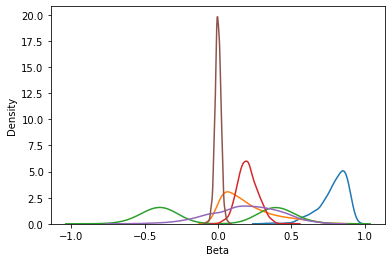

In [45]:
sns.kdeplot(dsFinal["Beta"])
sns.kdeplot(dsFinal["Exponencial"])
sns.kdeplot(dsFinal["Bimodal"])
sns.kdeplot(dsFinal["NormalP"])
sns.kdeplot(dsFinal["NormalL"])
sns.kdeplot(dsFinal["NormalM"])

<AxesSubplot:xlabel='NormalM', ylabel='Density'>

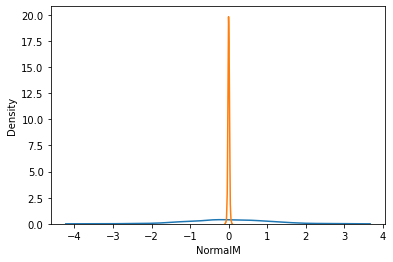

In [46]:
sns.kdeplot(dataset["NormalM"])
sns.kdeplot(dsFinal["NormalM"])

In [47]:
dsFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
Beta,1000.0,0.786586,0.098027,0.309876,0.735835,0.809068,0.859427,0.942703
Exponencial,1000.0,0.201138,0.172655,0.000264,0.064127,0.153200,0.293295,0.849558
Bimodal,1000.0,-0.001013,0.412620,-0.725339,-0.396333,0.002979,0.393940,0.724511
NormalP,1000.0,0.200586,0.067122,-0.001923,0.156150,0.197935,0.243261,0.506597
NormalL,1000.0,0.188012,0.225626,-0.594004,0.040585,0.197097,0.352666,0.704836
NormalM,1000.0,-0.000134,0.020500,-0.081709,-0.012692,-0.000498,0.013372,0.074361
